<a href="https://colab.research.google.com/github/LogeswaranSR/Iris-Classification-Using-Deep-Learning/blob/main/Iris_Classifier_Training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import ReduceLROnPlateau, EarlyStopping

In [2]:
data = load_iris().data
target = load_iris().target

In [4]:
data.shape

(150, 4)

In [5]:
num_classes = len(set(target))

In [6]:
target = to_categorical(target)
target[:5]

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.]], dtype=float32)

In [7]:
x_train, x_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=123)

In [8]:
input_shape = x_train.shape[1]

In [34]:
model= Sequential([
    Dense(16, activation='relu', input_shape = (input_shape,)),
    Dense(10, activation='relu'),
    Dense(num_classes, activation='softmax')
])
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['acc'])

In [35]:
lrreducer = ReduceLROnPlateau(monitor='acc', factor=0.5, min_lr=1e-5, patience=30)
early_stopping = EarlyStopping(monitor='acc', patience=30)
callbacks = [lrreducer, early_stopping]

In [36]:
history = model.fit(x_train, y_train, epochs=150, callbacks=callbacks)

Epoch 1/150
4/4 [==============================] - 1s 6ms/step - loss: 1.1926 - acc: 0.3083 - lr: 0.0010
Epoch 2/150
4/4 [==============================] - 0s 6ms/step - loss: 1.1615 - acc: 0.3083 - lr: 0.0010
Epoch 3/150
4/4 [==============================] - 0s 5ms/step - loss: 1.1358 - acc: 0.4583 - lr: 0.0010
Epoch 4/150
4/4 [==============================] - 0s 7ms/step - loss: 1.1191 - acc: 0.6000 - lr: 0.0010
Epoch 5/150
4/4 [==============================] - 0s 7ms/step - loss: 1.1053 - acc: 0.4667 - lr: 0.0010
Epoch 6/150
4/4 [==============================] - 0s 5ms/step - loss: 1.0957 - acc: 0.3750 - lr: 0.0010
Epoch 7/150
4/4 [==============================] - 0s 6ms/step - loss: 1.0855 - acc: 0.3500 - lr: 0.0010
Epoch 8/150
4/4 [==============================] - 0s 5ms/step - loss: 1.0776 - acc: 0.3667 - lr: 0.0010
Epoch 9/150
4/4 [==============================] - 0s 6ms/step - loss: 1.0700 - acc: 0.3833 - lr: 0.0010
Epoch 10/150
4/4 [==============================] - 0s 

In [37]:
model.evaluate(x_test, y_test)

1/1 [==============================] - 0s 230ms/step - loss: 0.2624 - acc: 0.9333


[0.26240676641464233, 0.9333333373069763]

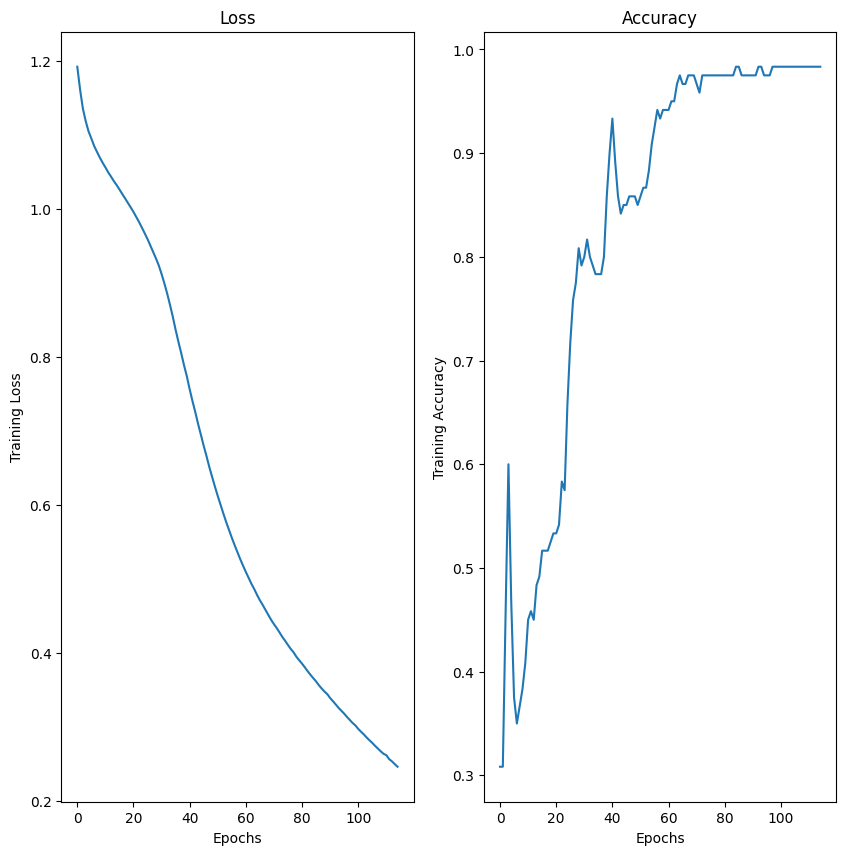

In [38]:
plt.figure(figsize=(10,10))

plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='Training Loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Training Loss')

plt.subplot(1,2,2)
plt.plot(history.history['acc'], label='Training Accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Training Accuracy')

plt.show()

In [39]:
model.save('iris_classifier.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
